<h1><center> **Information Retrieval in High-Dimensional Data** </center></h1>
<h1><center> Assignment 3: The Kernel Trick </center></h1>

<h3 align="center">*Felix Buchert, Daniela Geisinger, Johann Jahner, Alexander Ladwein, Beike Lu, Alexander Schwer - (G14)*</h3> 
<br>

In [1]:
import numpy as np

In [2]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

The function linear_pca expects a data matrix X and a number of PCs k and returns the first k PCA scores for the matrix X.
- Provide code that tests the function with selected images from the provided MNIST training dataset by visualizing the first 2 scores in a scatter plot.

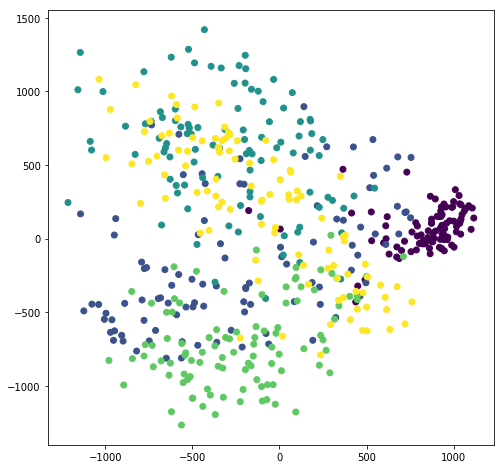

In [10]:
# Insert Code for Subtask 1.1 here
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

N=100#0 
digit_prefix=['d1','d2','d3','d4','d5']
d = len(digit_prefix)
X=np.zeros((784,d*N))
L_X=np.zeros((d*N))
for i,dp in enumerate(digit_prefix):
    for j in range(N):
        X[:,i*N+j]=np.float64(imageio.imread('mnist/'+dp+'/'+dp+'_'+'%04d.png'%(j+1)).ravel())
        L_X[i*N+j]=i
X=X-np.mean(X,1,keepdims=True)

S = linear_pca(X,2)

plt.figure(figsize=(8, 8))
im = plt.scatter(S[0,:],S[1,:], c = L_X)#, s=area, c=colors, alpha=0.5)
plt.show()

- Complete the function gram_pca such that it has the same functionality as linear_pca but expects a gram matrix $K = X^T X$ instead of the data matrix $X$ as its input. Do not assume that $K$ was produced from centered data.

In [11]:
def gram_pca(K,k):
    # Insert Code for Subtask 1.2 here
    n = K.shape[0]
    K_c= K - np.dot(1/n*np.ones((n,n)),K) - np.dot(K,1/n*np.ones((n,n))) + np.dot(1/n*np.ones((n,n)),np.dot(K,1/n*np.ones((n,n))))
    
    ew,ev = np.linalg.eig(K_c)
    Sigma_k = np.diag(np.sqrt(ew[:k]))
    
    S = np.dot(Sigma_k,ev[:,:k].T)
    return S

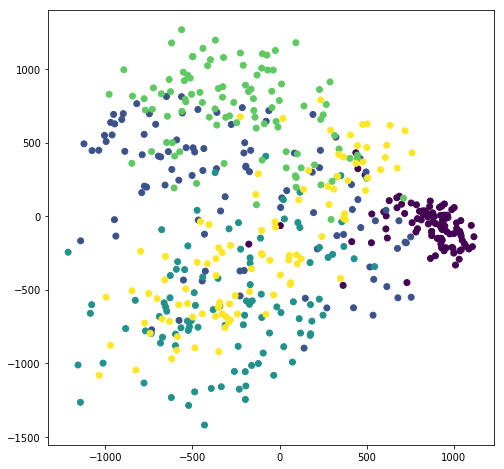

In [12]:
# Insert Code for Subtask 1.3 here
S_gram = gram_pca(np.dot(X.T,X),2)

plt.figure(figsize=(8, 8))
im = plt.scatter(S_gram[0,:],S_gram[1,:], c = L_X)#, s=area, c=colors, alpha=0.5)
plt.show()

In [13]:
def compute_gaussian_gram_matrix(X, sigma):
    #Insert Code for Subtask 1.4 here
    K = np.zeros((X.shape[1],X.shape[1]))
    for n in range(0,X.shape[1]):
        for m in range(0,X.shape[1]):
            K[n,m] = np.exp((-(np.linalg.norm(X[:,n]-X[:,m])**2))/(2*sigma**2))
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

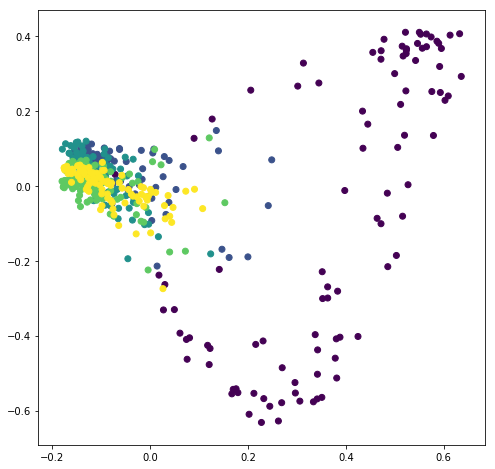

In [15]:
#Insert Code for Subtask 1.5 here
S_gauss = gaussian_kernel_pca(X,2,1000)

plt.figure(figsize=(8, 8))
im = plt.scatter(S_gauss[0,:],S_gauss[1,:], c = L_X)#, s=area, c=colors, alpha=0.5)
plt.show()